In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-0.005,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':0.045,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':['2021-01-01'],'value':[-4000]},
                'target':'capex'
            }
    ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.15,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':'2021-01-01',
    'end':'2030-01-01',
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 2500, 'scale': 200} bbl/d 
 Di: 0.15 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2030, 1, 1), time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=-5.0, array_values=None, target='opex', multiply=None, agg='sum', wi=1), CashFlowParams(name='var_opex', const_value=-0.005, array_values=None, target='opex', multiply='oil_volume', agg='sum', wi=1), CashFlowParams(name='income', const_value=0.045, array_values=None, target='income', multiply='oil_volume', agg='sum', wi=1), CashFlowParams(name='capex', const_value=None, array_values=ChgPts(date=[datetime.date(2021, 1, 1)], value=[-4000.0]), target='capex', multiply=None, agg='sum', wi=1)], cashflow=None, depends=None, forecast=None)

In [4]:
fore1 = p1.generate_forecast()
fore1.head()

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:240: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021,2793.695333,0.000000e+00,0,0.000000,5000.0,2206.304667,0.441261,0.789744,0.000000e+00,0.0,0.000000e+00,0.0,pdp
2022,2404.555856,9.469061e+05,0,946906.058579,5000.0,2595.444144,0.519089,1.079386,9.473371e+05,1825000.0,9.473371e+05,1825000.0,pdp
2023,2069.620405,1.761916e+06,0,815009.597544,5000.0,2930.379595,0.586076,1.415902,2.016926e+06,3650000.0,1.069589e+06,1825000.0,pdp
2024,1781.338791,2.463401e+06,0,701485.261469,5000.0,3218.661209,0.643732,1.806878,3.191737e+06,5475000.0,1.174811e+06,1825000.0,pdp
2025,1532.582548,3.068708e+06,0,605306.857397,5000.0,3467.417452,0.693483,2.262467,4.460812e+06,7305000.0,1.269075e+06,1830000.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

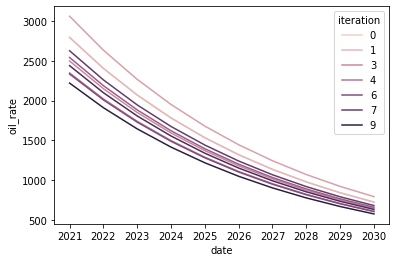

In [5]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration')

In [6]:
c1 = p1.generate_cashflow()

In [7]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
2021,0.000000,0.000000,-5.0,0.000000,-5.000000,-4000.0,-4000.0,-4005.000000,-4005.000000
2022,42610.772636,42610.772636,-5.0,-4734.530293,-4739.530293,0.0,0.0,37871.242343,33866.242343
2023,36675.431889,36675.431889,-5.0,-4075.047988,-4080.047988,0.0,0.0,32595.383902,66461.626245
2024,31566.836766,31566.836766,-5.0,-3507.426307,-3512.426307,0.0,0.0,28054.410459,94516.036704
2025,27238.808583,27238.808583,-5.0,-3026.534287,-3031.534287,0.0,0.0,24207.274296,118723.311000
2026,23375.679428,23375.679428,-5.0,-2597.297714,-2602.297714,0.0,0.0,20773.381714,139496.692713
2027,20119.633738,20119.633738,-5.0,-2235.514860,-2240.514860,0.0,0.0,17879.118878,157375.811591
2028,17317.129241,17317.129241,-5.0,-1924.125471,-1929.125471,0.0,0.0,15388.003770,172763.815361
2029,14942.832951,14942.832951,-5.0,-1660.314772,-1665.314772,0.0,0.0,13277.518179,186041.333540
2030,12823.573827,12823.573827,-5.0,-1424.841536,-1429.841536,0.0,0.0,11393.732290,197435.065830


In [8]:
p1.npv([0,0.1,0.15])

,npv,iteration
0.00,197435.065830,0
0.10,136886.849968,0
0.15,117281.979354,0
0.00,197554.492519,1
0.10,136970.378174,1
0.15,117353.884194,1
0.00,216693.795667,2
0.10,150356.595832,2
0.15,128877.343167,2
0.00,176123.687743,3


In [9]:
p1.irr(freq_output='M')

,irr
0,9.316692
1,9.322298
2,10.220652
3,8.316386
4,7.808434
5,8.465703
6,7.761023
7,8.751914
8,8.117222
9,7.375175
